## Observations and Insights 

In [2]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as sts
import numpy as np
from scipy.stats import linregress

# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

#print results from each csv
print(f"Data Shape Mouse Meta Data: {mouse_metadata.shape}")
print(f"Data Shape Study Results: {study_results.shape}")


Data Shape Mouse Meta Data: (249, 5)
Data Shape Study Results: (1893, 4)


In [3]:
# Combine the data into a single dataset

new_df = pd.merge(mouse_metadata, study_results, how="outer", on='Mouse ID', )

# Display the data table for preview

new_df.head()

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1


In [4]:
# Checking the number of mice.
mice_count = new_df['Mouse ID'].count()

mice_count

1893

In [5]:
# Getting the duplicate mice by ID number that shows up for Mouse ID and Timepoint. 
# new_df.duplicated(subset=['Mouse ID', 'Timepoint']), 'Mouse ID'
new_df.loc[new_df.duplicated(subset=['Mouse ID', 'Timepoint']), 'Mouse ID']

duplicate_mice = new_df.loc[new_df.duplicated(subset=['Mouse ID', 'Timepoint']), 'Mouse ID'].unique()



In [6]:
# Optional: Get all the data for the duplicate mouse ID. 

print(duplicate_mice)


['g989']


In [7]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.

single_mouse = new_df[new_df['Mouse ID'].isin(duplicate_mice)==False]

single_mouse['Mouse ID'].count()

1880

In [8]:
# Checking the number of mice in the clean DataFrame.
count_mice = single_mouse.groupby('Mouse ID')

total_mice = len(count_mice)

total_mice

248

## Summary Statistics

In [9]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen

# This method produces everything in a single groupby function

summary_stats_1 = single_mouse.groupby('Drug Regimen')
first_table = summary_stats_1.agg(['mean', 'median', 'var','std', 'sem'])['Tumor Volume (mm3)']
first_table

,mean,median,var,std,sem
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.320930,50.446266,43.852013,6.622085,0.544332
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


In [10]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen

# This method is the most straighforward, creating multiple series and putting them all together at the end.

group_mean = single_mouse.groupby('Drug Regimen').mean()['Tumor Volume (mm3)']
group_median = single_mouse.groupby('Drug Regimen').median()['Tumor Volume (mm3)']
group_var = single_mouse.groupby('Drug Regimen').var()['Tumor Volume (mm3)']
group_std = single_mouse.groupby('Drug Regimen').std()['Tumor Volume (mm3)']
group_sem = single_mouse.groupby('Drug Regimen').sem()['Tumor Volume (mm3)']


summary_stats = pd.DataFrame({'Mean': group_mean,
                             'Median': group_median,
                             'Variance': group_var,
                             'St Dev': group_std,
                             'SEM': group_sem})
summary_stats

,Mean,Median,Variance,St Dev,SEM
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.320930,50.446266,43.852013,6.622085,0.544332
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


# Bar and Pie Charts

Text(0, 0.5, 'Number of Mice')

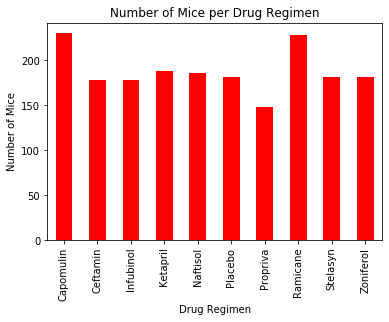

In [11]:
# Generate a bar plot showing the total number of mice for each treatment throughout the course of the study using pandas. 

#find the number of mice per drug regimen
mice_per_treatment = single_mouse.groupby(['Drug Regimen']).count()['Mouse ID']

#print the number of mice per treatment
mice_per_treatment

#plot using pandas 
mice_per_treatment.plot(kind='bar', color={'red'})

#label data
plt.title('Number of Mice per Drug Regimen')
plt.ylabel('Number of Mice')

#somehow the xaxis is already labeled?

Text(0.5, 0, 'Drug Regimen')

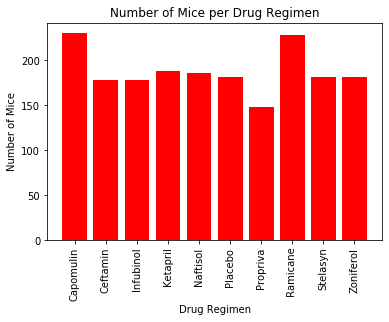

In [73]:
# Generate a bar plot showing the total number of mice for each treatment throughout the course of the study using pyplot.

#find the number of mice per drug regimen
mice_per_treatment = single_mouse.groupby(['Drug Regimen']).count()['Mouse ID']

#create an array 
users = mice_per_treatment
users

x_axis = np.arange(len(users))
x_axis

#plot the data to a bar graph
plt.bar(x=x_axis, height=users, color='r', alpha=1, align='center')

#label the bars
plt.xticks(x_axis, ['Capomulin', 'Ceftamin', 'Infubinol', 'Ketapril', 'Naftisol', 'Placebo', 'Propriva',' Ramicane', 'Stelasyn', 'Zoniferol'], rotation=90)
plt.title('Number of Mice per Drug Regimen')
plt.ylabel('Number of Mice')
plt.xlabel('Drug Regimen')

Text(0.5, 1.0, 'Gender Distribution of Mice')

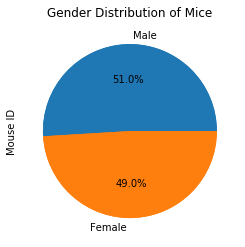

In [82]:
# Generate a pie plot showing the distribution of female versus male mice using pandas

#find the number of mice per gender
mice_per_gender = single_mouse.groupby(['Sex']).count()['Mouse ID']

mice_per_gender = single_mouse.groupby(['Sex']).count()['Mouse ID']

mice_per_gender


num_male = 958
num_female = 922
labels = ['Male', 'Female']

counts = [num_male, num_female]

#plot using pandas 
mice_per_gender.plot.pie(y='counts', labels=labels)

plt.pie(counts, autopct='%1.1f%%')
plt.title('Gender Distribution of Mice')



Text(0.5, 1.0, 'Gender Distribution of Mice')

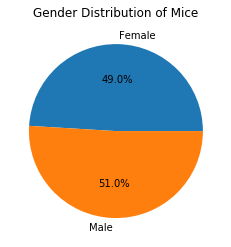

In [83]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot

#find the number of mice per gender
mice_per_gender = single_mouse.groupby(['Sex']).count()['Mouse ID']

mice_per_gender

labels = ['Male', 'Female']
counts = [958, 92]
colors = ['orange', 'blue'] 

#plot using pandas 
plt.pie(counts, labels=labels, autopct='%1.1f%%')

plt.title('Gender Distribution of Mice')



## Quartiles, Outliers and Boxplots

In [15]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:  
# final_tumor_vol = single_mouse.groupby(['Drug Regimen', 'Mouse ID'])['Tumor Volume (mm3)']
# last_values = final_tumor_vol.last()

# Capomulin, Ramicane, Infubinol, and Ceftamin
# capomulin = single_mouse.loc[single_mouse['Drug Regimen'] == 'Capomulin', ['Mouse ID', 'Timepoint']]
# ramicane = single_mouse.loc[single_mouse['Drug Regimen'] == 'Ramicane',:]
# infubinol = single_mouse.loc[single_mouse['Drug Regimen'] == 'Infubinol',:]
# ceftamin = single_mouse.loc[single_mouse['Drug Regimen'] == 'Ceftamin',:]

# print(capomulin)
# print(ramicane)
# print(infubinol)
# print(ceftamin)

# Start by getting the last (greatest) timepoint for each mouse
# greatest_cap = capomulin.groupby('Mouse ID').max()['Timepoint']
# greatest_ram = ramicane.groupby('Mouse ID').max()['Timepoint']
# greatest_inf = infubinol.groupby('Mouse ID').max()['Timepoint']
# greatest_cef = ceftamin.groupby('Mouse ID').max()['Timepoint']

# #convert each to a data frame
# df_cap = pd.DataFrame(greatest_cap)
# df_cap
# df_ram = pd.DataFrame(greatest_ram)
# df_ram
# df_inf = pd.DataFrame(greatest_inf)
# df_cef = pd.DataFrame(greatest_cef)
# df_cef

# # Merge this group df with the original dataframe to get the tumor volume at the last timepoint
# cap_merge = pd.merge(new_df, df_cap, on=('Mouse ID', 'Timepoint'), how='right')
# cap_merge.head()

# ram_merge = pd.merge(new_df, df_ram, on=('Mouse ID', 'Timepoint'), how='right')
# ram_merge.head()

# inf_merge = pd.merge(new_df, df_inf, on=('Mouse ID', 'Timepoint'), how='right')
# inf_merge.head()

# cef_merge = pd.merge(new_df, df_cef, on=('Mouse ID', 'Timepoint'), how='right')
# cef_merge.head()

# #concat all dataframes together 
# total_merge = pd.concat([cap_merge, ram_merge, inf_merge, cef_merge])

# total_merge

#ATTEMPT NUMBER THREE (ugh)

# Calculate the final tumor volume of each mouse across four of the treatment regimens:  
# Capomulin, Ramicane, Infubinol, and Ceftamin
# something_new = single_mouse[single_mouse['Drug Regimen'].isin(['Capomulin', 'Ramicane', 'Infubinol', 'Ceftamin'])]

# something_new

capomulin = single_mouse['Drug Regimen'] == 'Capomulin'
capomulin_values = single_mouse[capomulin]
capomulin_values.head()

ramicane = single_mouse['Drug Regimen'] == 'Ramicane'
ramicane_values = single_mouse[ramicane]
ramicane_values.head()

infubinol = single_mouse['Drug Regimen'] == 'Infubinol'
infubinol_values = single_mouse[infubinol]
infubinol_values.head()

ceftamin = single_mouse['Drug Regimen'] == 'Ceftamin'
ceftamin_values = single_mouse[ceftamin]
ceftamin_values.head()

# Start by getting the last (greatest) timepoint for each mouse
cap_id = capomulin_values.groupby(['Mouse ID']).max()['Timepoint']
cap_DF = pd.DataFrame(cap_id)

ram_id = ramicane_values.groupby(['Mouse ID']).max()['Timepoint']
ram_DF = pd.DataFrame(ram_id)

inf_id = infubinol_values.groupby(['Mouse ID']).max()['Timepoint']
inf_DF = pd.DataFrame(inf_id)

cef_id = ceftamin_values.groupby(['Mouse ID']).max()['Timepoint']
cef_DF = pd.DataFrame(cef_id)

# Merge this group df with the original dataframe to get the tumor volume at the last timepoint

merge_cap = pd.merge(cap_DF, single_mouse, on=['Mouse ID', 'Timepoint'], how='left' )

merge_ram = pd.merge(ram_DF, single_mouse, on=['Mouse ID', 'Timepoint'], how='left')

merge_inf = pd.merge(inf_DF, single_mouse, on=['Mouse ID', 'Timepoint'], how='left')

merge_cef = pd.merge(cef_DF, single_mouse, on=['Mouse ID', 'Timepoint'], how='left')



In [16]:
merge_cap

,Mouse ID,Timepoint,Drug Regimen,Sex,Age_months,Weight (g),Tumor Volume (mm3),Metastatic Sites
0,b128,45,Capomulin,Female,9,22,38.982878,2
1,b742,45,Capomulin,Male,7,21,38.939633,0
2,f966,20,Capomulin,Male,16,17,30.485985,0
3,g288,45,Capomulin,Male,3,19,37.074024,1
4,g316,45,Capomulin,Female,22,22,40.159220,2
5,i557,45,Capomulin,Female,1,24,47.685963,1
6,i738,45,Capomulin,Female,23,20,37.311846,2
7,j119,45,Capomulin,Female,7,23,38.125164,1
8,j246,35,Capomulin,Female,21,21,38.753265,1
9,l509,45,Capomulin,Male,17,21,41.483008,3


In [17]:
# Put treatments into a list for for loop (and later for plot labels)
treatments = ['Capomulin', 'Ramicane', 'Infubinol', 'Ceftamin']

# Create empty list to fill with tumor vol data (for plotting)

tumor_volume_cap = merge_cap[['Tumor Volume (mm3)']]
tumor_volume_cap

tumor_volume_ram = merge_ram[['Tumor Volume (mm3)']]
tumor_volume_ram

tumor_volume_inf = merge_inf[['Tumor Volume (mm3)']]
tumor_volume_inf

tumor_volume_cef = merge_cef[['Tumor Volume (mm3)']]
tumor_volume_cef

data = [tumor_volume_cap, tumor_volume_ram, tumor_volume_inf, tumor_volume_cef]


In [18]:
# quartiles = tumor_volume_cap.quantile([.25, .5, .75])

# q1 = quartiles[.25]

In [19]:
# Calculate the IQR and quantitatively determine if there are any potential outliers. 

#CAPOMULIN
cap_quants = tumor_volume_cap.quantile([0.25, 0.5, 0.75], axis = 0)
cap_quants = cap_quants.reset_index()
type(cap_quants.iloc[0])
capq1 = cap_quants.iloc[0,1]
capq2 = cap_quants.iloc[1,1]
capq3 = cap_quants.iloc[2,1]

capiqr = capq3-capq1

capiqr
#['index'] figure out what this is

#RAMICANE
ram_quants = tumor_volume_ram.quantile([0.25, 0.5, 0.75], axis = 0)
ram_quants = ram_quants.reset_index()
type(ram_quants.iloc[0])
ramq1 = ram_quants.iloc[0,1]
ramq2 = ram_quants.iloc[1,1]
ramq3 = ram_quants.iloc[2,1]

ramiqr = ramq3-ramq1

ramiqr

#INFUBINOL
inf_quants = tumor_volume_inf.quantile([0.25, 0.5, 0.75], axis = 0)
inf_quants = inf_quants.reset_index()
type(inf_quants.iloc[0])
infq1 = inf_quants.iloc[0,1]
infq2 = inf_quants.iloc[1,1]
infq3 = inf_quants.iloc[2,1]

infiqr = infq3-infq1

infiqr

#CEFTAMIN
cef_quants = tumor_volume_cef.quantile([0.25, 0.5, 0.75], axis = 0)
cef_quants = cef_quants.reset_index()
type(cef_quants.iloc[0])
cefq1 = cef_quants.iloc[0,1]
cefq2 = cef_quants.iloc[1,1]
cefq3 = cef_quants.iloc[2,1]

cefiqr = cefq3-cefq1

cefiqr

print(capiqr, infiqr)

7.781863460000004 11.477135160000003


In [20]:
 # Locate the rows which contain mice on each drug and get the tumor volumes

    # add subset 
    
    
    # Determine outliers using upper and lower bounds
    
#CAPOMULIN 
tumor_volume_cap.index

cap_lb = capq1 - (1.5*capiqr)
cap_ub = capq3 + (1.5*capiqr)

print(cap_lb)
print(cap_ub)

# #determine outliers for capomulin
cap_outliers = tumor_volume_cap['Tumor Volume (mm3)'].loc[(tumor_volume_cap['Tumor Volume (mm3)'] < cap_lb) | (tumor_volume_cap['Tumor Volume (mm3)'] > cap_ub)]
print(cap_outliers)

#RAMICANE
ram_lb = ramq1 - (1.5*ramiqr)
ram_ub = ramq3 + (1.5*ramiqr)

print(ram_lb)
print(ram_ub)

ram_outliers = tumor_volume_ram['Tumor Volume (mm3)'].loc[(tumor_volume_ram['Tumor Volume (mm3)'] < ram_lb) | (tumor_volume_ram['Tumor Volume (mm3)'] > ram_ub)]
print(ram_outliers)


# #INFUBOLIN
inf_lb = infq1 - (1.5*infiqr)
inf_ub = infq3 + (1.5*infiqr)

print(inf_lb)
print(inf_ub)

inf_outliers = tumor_volume_inf['Tumor Volume (mm3)'].loc[(tumor_volume_inf['Tumor Volume (mm3)'] < inf_lb) | (tumor_volume_inf['Tumor Volume (mm3)'] > inf_ub)]
inf_outliers

# #CEFTAMIN
cef_lb = cefq1 - (1.5*cefiqr)
cef_ub = cefq3 + (1.5*cefiqr)

print(cef_lb)
print(cef_ub)

cef_outliers = tumor_volume_cef['Tumor Volume (mm3)'].loc[(tumor_volume_cef['Tumor Volume (mm3)'] < cef_lb) | (tumor_volume_cef['Tumor Volume (mm3)'] > cef_ub)]
print(cef_outliers)

print(f'There are no outliers in Capomullin, Ramicane, and Ceftamin. The only outlier is found in Infubolin, which may be {inf_outliers}')

20.70456164999999
51.83201549
Series([], Name: Tumor Volume (mm3), dtype: float64)
17.912664470000003
54.30681135
Series([], Name: Tumor Volume (mm3), dtype: float64)
36.83290494999999
82.74144559000001
25.355449580000002
87.66645829999999
Series([], Name: Tumor Volume (mm3), dtype: float64)
There are no outliers in Capomullin, Ramicane, and Ceftamin. The only outlier is found in Infubolin, which may be 5    36.321346
Name: Tumor Volume (mm3), dtype: float64


In [21]:
# Generate a box plot of the final tumor volume of each mouse across four regimens of interest

cap = np.array(tumor_volume_cap).flatten()
print(new)

ram = np.array(tumor_volume_ram).flatten()
print(rat)

inf = np.array(tumor_volume_inf).flatten()

cef = np.array(tumor_volume_cef).flatten()

data = [cap, ram, inf, cef]


fig = plt.figure(1, figsize = (10,5))
ax = fig.add_subplot(111)
boxplot = ax.boxplot(data)

plt.title('Drug Regimens and Final Tumor Volume')
plt.ylabel('Tumor Volume (mm3)')
ax.set_xticklabels(['Capomulin', 'Ramicane', 'Infubolin', 'Ceftamin'])

plt.tight_layout()

NameError: name 'new' is not defined

## Line and Scatter Plots

In [22]:
# Generate a line plot of time point versus tumor volume for a mouse treated with Capomulin
x_axis_data = np.arange(0,50,2)
x_axis_data

data = new
data

plt.plot(x_axis_data, data)
plt.xlabel('Timepoint (days)')
plt.ylabel('Tumor Volume (mm3)')
plt.title('Tumor Volume with Capomulin Treatment')

NameError: name 'new' is not defined

[36. 37. 38. 39. 40. 41. 42. 43. 44.]
Weight (g)
15    36.182040
17    37.214133
19    41.182391
20    39.141053
21    42.088700
22    43.288490
23    43.341051
24    44.805810
25    44.062109
Name: Tumor Volume (mm3), dtype: float64


Text(0.5, 1.0, 'Weight and Average Tumor Volume')

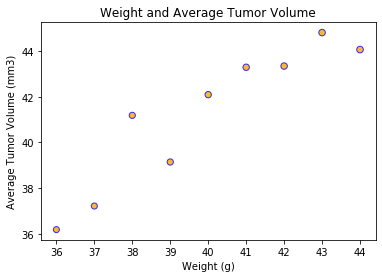

In [23]:
# Generate a scatter plot of mouse weight versus average tumor volume for the Capomulin regimen
#single_mouse.groupby(['Weight (g)'])['Tumor Volume (mm3)'].mean()

capomulin = single_mouse['Drug Regimen'] == 'Capomulin'
capomulin_values = single_mouse[capomulin]
capomulin_values

weight_group = capomulin_values.groupby(['Weight (g)'])['Tumor Volume (mm3)'].mean()
x_limit = weight_group.max()
x_axis = np.arange(36, x_limit, 1)
print(x_axis)
data = weight_group
print(data)

plt.scatter(x=x_axis, y=data, marker="o", facecolors="orange", edgecolors="blue", s=x_axis, alpha=0.8)
plt.xlabel('Weight (g)')
plt.ylabel('Average Tumor Volume (mm3)')
plt.title('Weight and Average Tumor Volume')

## Correlation and Regression

In [59]:
# Calculate the correlation coefficient and linear regression model 
# for mouse weight and average tumor volume for the Capomulin regimen

new = weight_group.reset_index()
mouse_weight = new['Weight (g)']
cap_tum = new['Tumor Volume (mm3)']

correlation = sts.pearsonr(mouse_weight, cap_tum)

print(f"The correlation coefficient (r) is {round(correlation[0],2)}")
print(f"The p-value is {correlation[1]}")

The correlation coefficient (r) is 0.95
The p-value is 8.449451040646294e-05


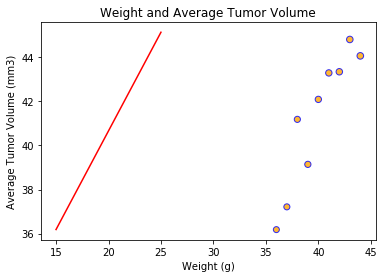

In [72]:
plt.scatter(x=x_axis, y=data, marker="o", facecolors="orange", edgecolors="blue", s=x_axis, alpha=0.8)
plt.xlabel('Weight (g)')
plt.ylabel('Average Tumor Volume (mm3)')
plt.title('Weight and Average Tumor Volume')

# Run the regression and store each of the returned values
(slope, intercept, rvalue, pvalue, stderr) = linregress(mouse_weight, cap_tum)

# Calculate the predictions for each value of x (blood pressure)
regress_values = mouse_weight * slope + intercept

# Create the linear equation
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

# Plot the regression line
plt.plot(mouse_weight, regress_values, "red")

# # Add the linear equation to the plot
# plt.annotate(line_eq, (-0.12, 330), fontsize=15, color="red")
# plt.annotate(f"R2 = {round(rvalue**2,3)}", (-0.12, 315), fontsize=15, color="red")

# # calculate r2
# print(f"The r-squared is: {rvalue**2}")
